<a href="https://colab.research.google.com/github/dinukaattanayaka/ML-SVM-image-classification-American-president-/blob/main/ML_SVM_image_classification(American_president)(test_the_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import joblib

model=joblib.load('/content/drive/MyDrive/machine learning/DAY 2/ML SVM image classification(American president)(my).sav')

In [3]:
category_dict={0:'Barack Obama', 1:'Donald Trump',2:'George W Bush'}

['president-george-w-bush-listens-to-a-question-during-a-news-news-photo-1591807580.jpg', 'screen_shot_2020-06-07_at_9.28.05_am.png', 'barack-obama-12782369-1-402.jpg', 'barack-obama.jpeg', 'trump.jpg', 'https___d1e00ek4ebabms.cloudfront.net_production_b8c5ac6e-d1ec-467a-b185-a5c7b2fc1c9b.jpg']


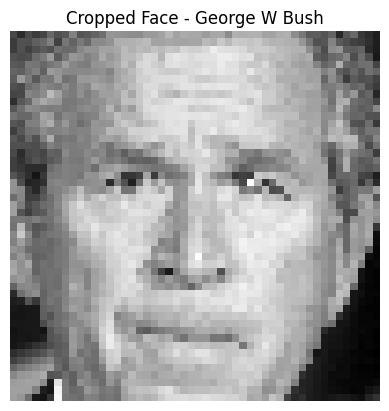

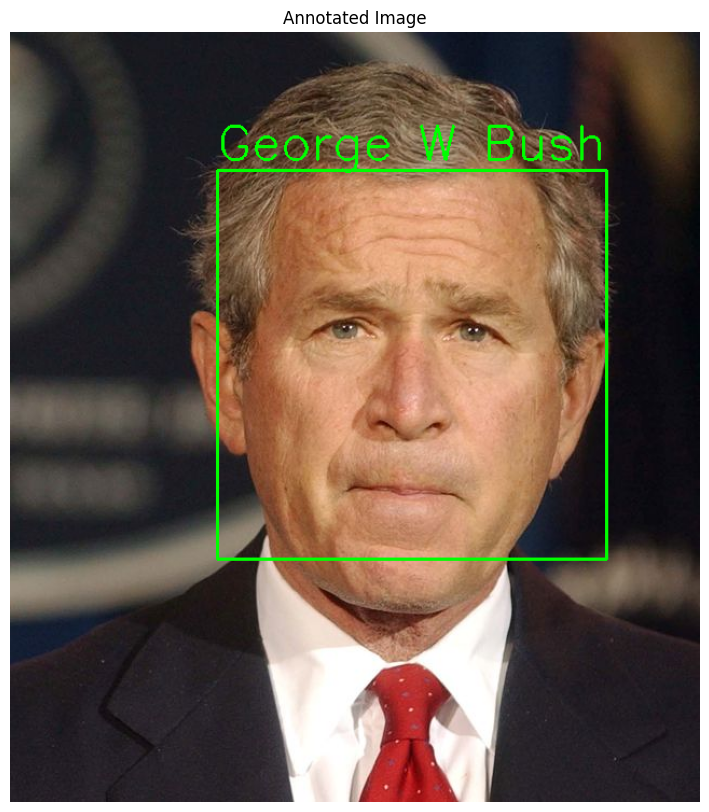

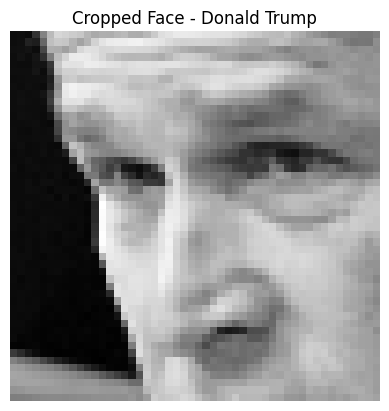

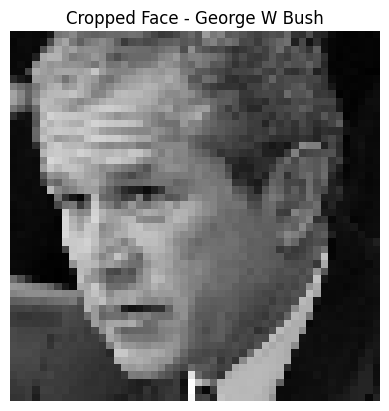

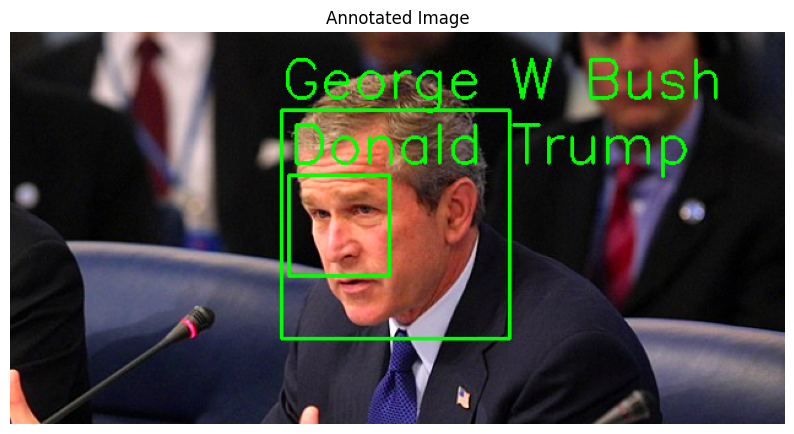

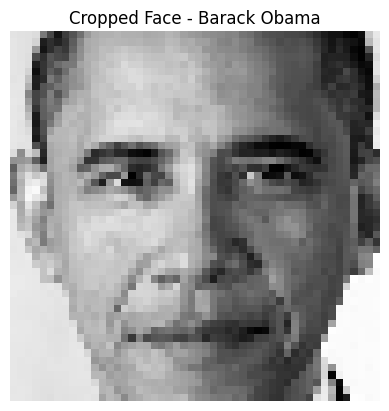

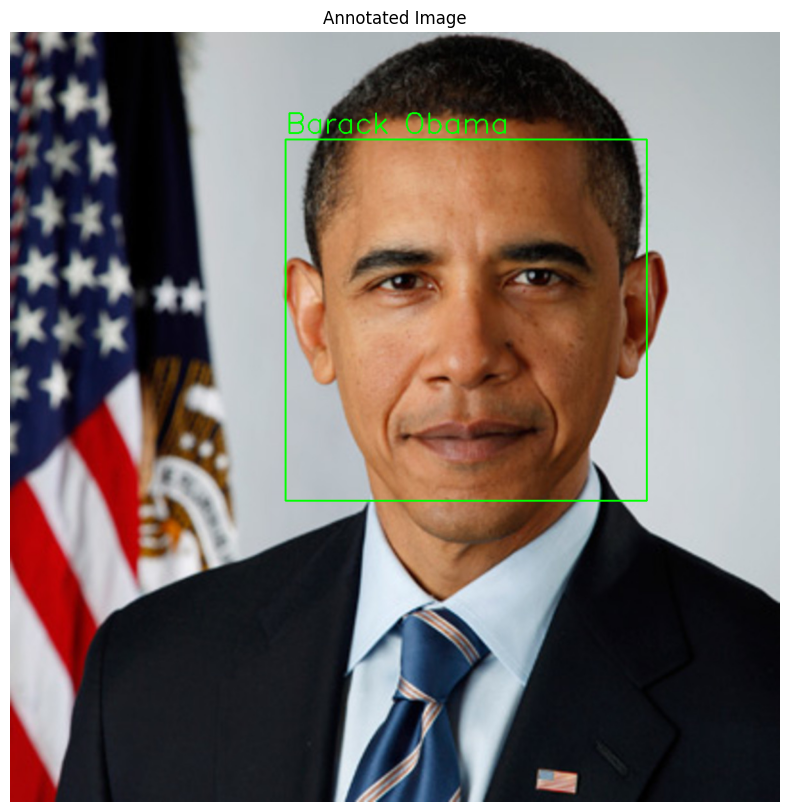

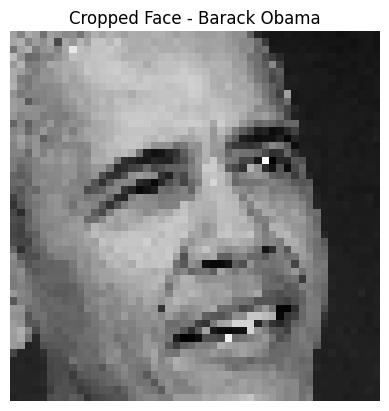

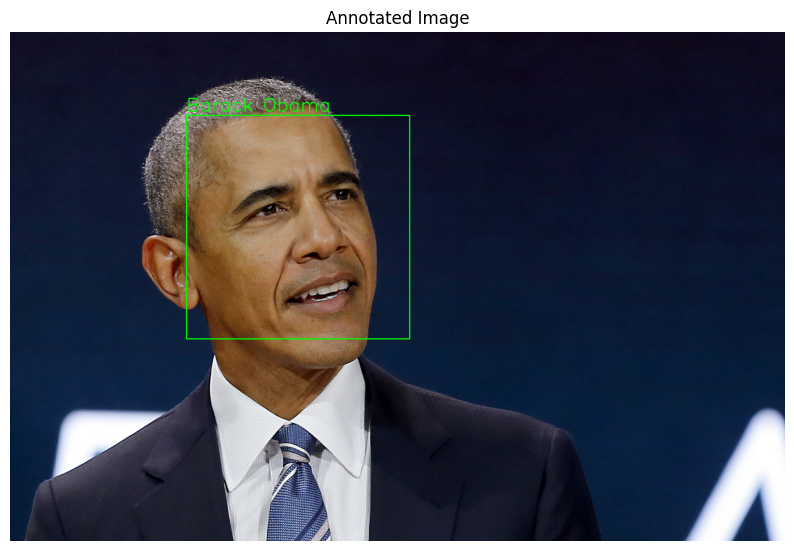

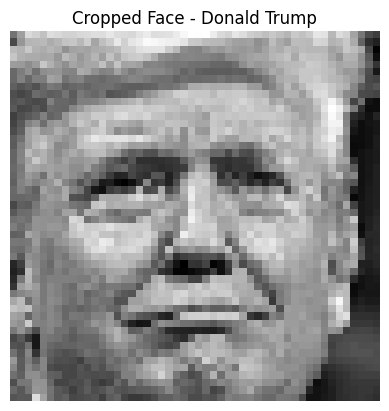

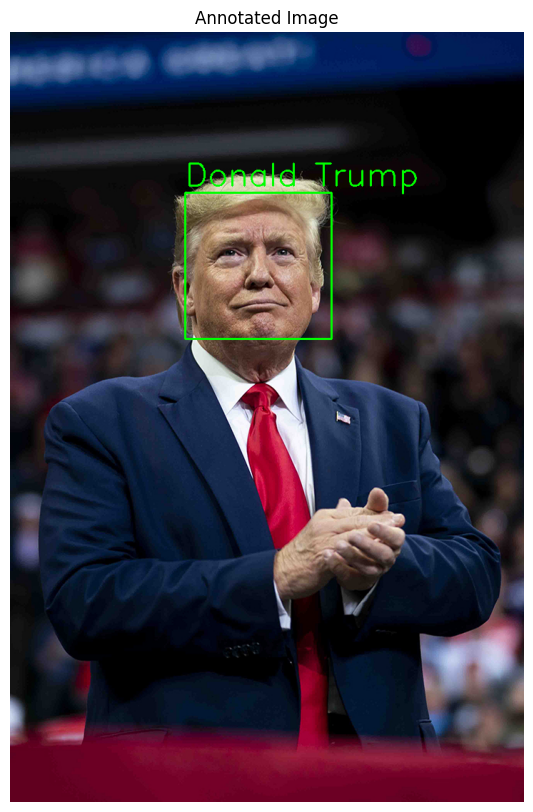

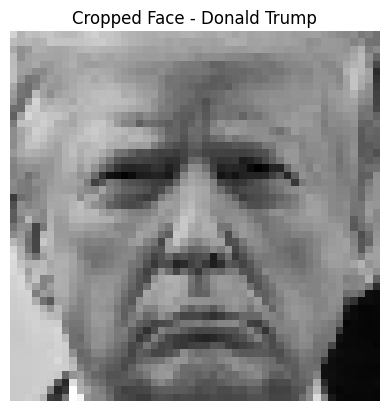

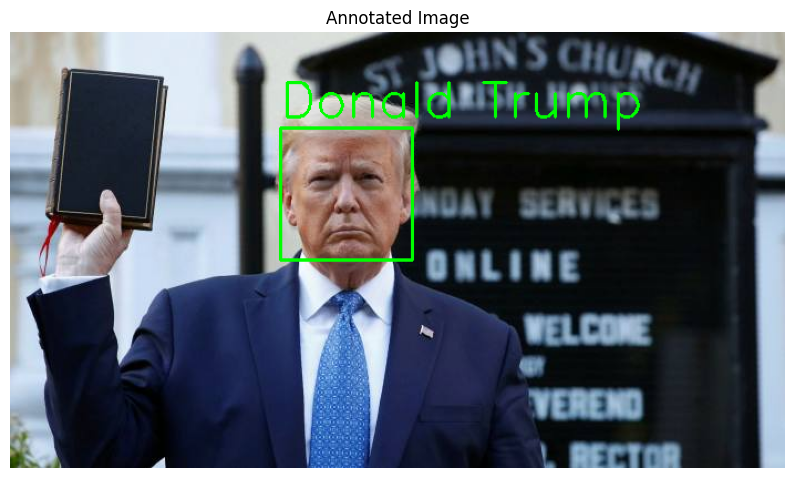

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
test_data_path = '/content/drive/MyDrive/machine learning/DAY 2/test_data'
face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/machine learning/DAY 2/haarcascade_frontalface_default.xml')

# List test images
test_img_names = os.listdir(test_data_path)
print(test_img_names)

for test_img_name in test_img_names:
    img_path = os.path.join(test_data_path, test_img_name)
    test_img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_classifier.detectMultiScale(gray)

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop and preprocess face
        cropped_face = gray[y:y + h, x:x + w]
        cropped_face = cv2.resize(cropped_face, (50, 50))
        cropped_original = cropped_face.copy()
        cropped_face = cropped_face.reshape(1, 50 * 50)

        # Predict and add label
        result = model.predict(cropped_face)
        name = category_dict[result[0]]  #result kyn eka Array ekak vidyt ena nisi a array eke 0 element eka gnna kyl kyn element eka watunama, name=category_dict[2] wge wenw


        # Add text to the image
        cv2.putText(test_img, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)

        # Display cropped face (inline)
        plt.figure()
        plt.imshow(cropped_original, cmap='gray')
        plt.title(f'Cropped Face - {name}')
        plt.axis('off')
        plt.show()

    # Display the full image with annotations (inline)
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(test_img_rgb)
    plt.title('Annotated Image')
    plt.axis('off')
    plt.show()
